# Dependencies

In [2]:
pacman::p_load(ggplot2, fitdistrplus, distr)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

find an appropriate distribution to draw random samples from. Based on entire INT PBMC samples regardless of cancer or cycle

In [6]:
meta_div <- readr::read_rds(file = paste0(datapath,"capTCRseq/meta_div_goodsamples.rds"))

In [7]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),] 

In [8]:
dim(pbmc)

[1] 197  67

In [9]:
pbmc <- pbmc[ which(pbmc$cycle != "X00"),]

In [10]:
dim(pbmc)

[1] 197  67

In [11]:
x <- pbmc$TRB[!is.na(pbmc$TRB)]

summary statistics
------
min:  1   max:  2237 
median:  132 
mean:  250.1168 
estimated sd:  302.9223 
estimated skewness:  2.716298 
estimated kurtosis:  14.17998 

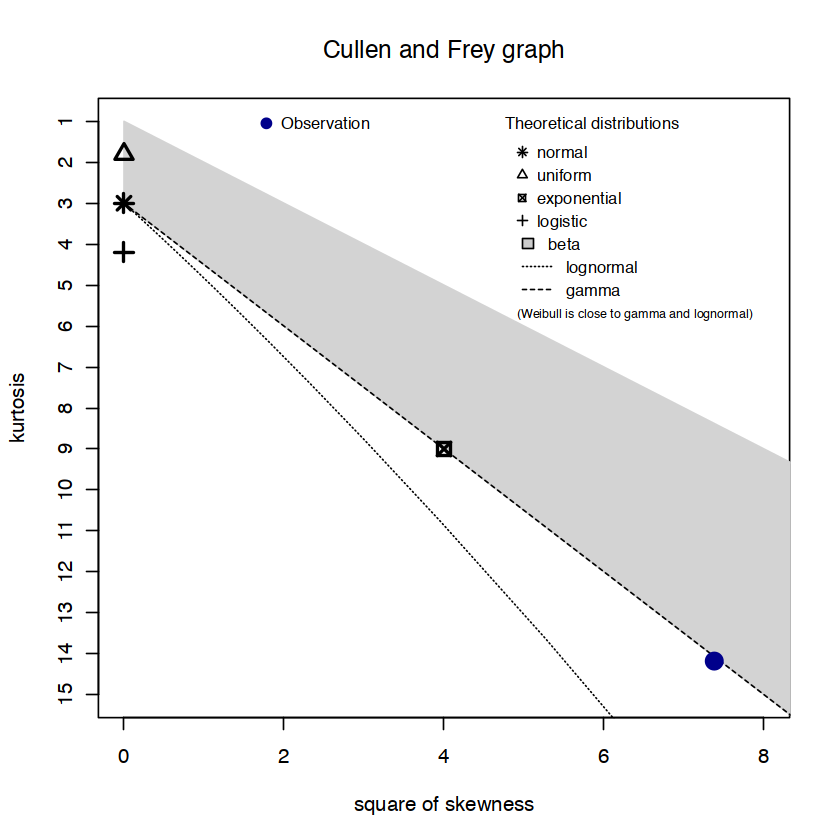

In [12]:
descdist(x, discrete = FALSE)

In [13]:
fit.weibull <- fitdist(x, "weibull")
fit.lnorm <- fitdist(x, "lnorm")
fit.gamma <- fitdist(x, "gamma")

In [14]:
fit.weibull

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters:
         estimate  Std. Error
shape   0.8669608  0.04743583
scale 231.9167342 20.11248322

In [15]:
summary(pbmc$TRB[!is.na(pbmc$TRB)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    55.0   132.0   250.1   351.0  2237.0 

In [16]:
# Weibull distribution based on INT data
set.seed(777)
mydist <- Truncate(Weibull(shape=0.8669608,scale=231.9167342),lower=1,upper=2237) 

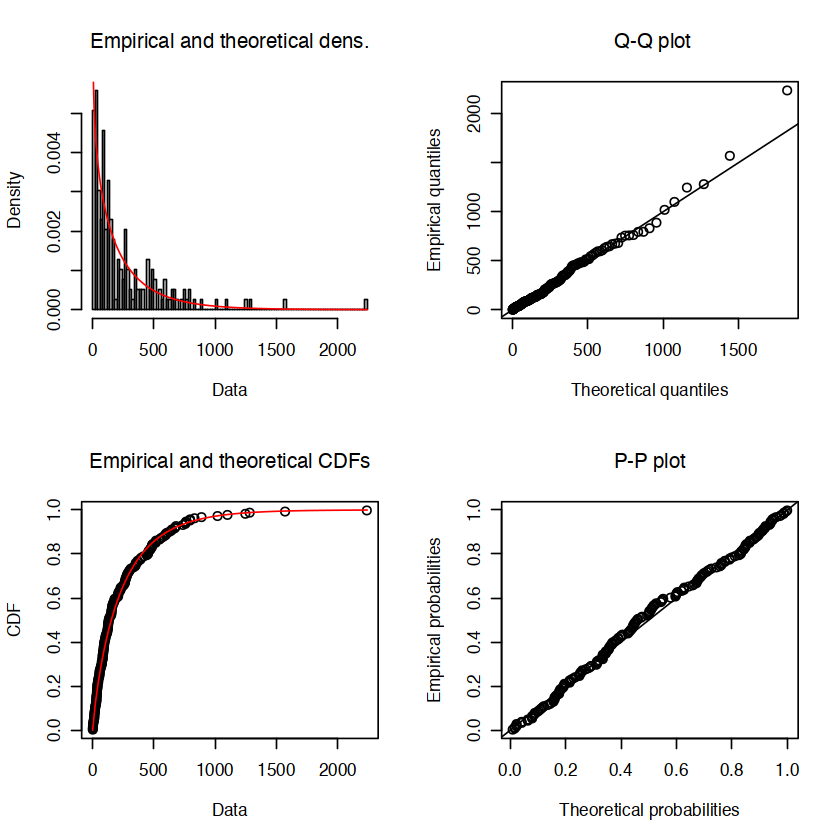

In [17]:
plot(fit.weibull, breaks = 100)
# par(mar=c(0,0,7,0))
# mtext("Total TCR counts in PBMC samples (CapTCR-seq),\nWeibull distribution", side = 3, line = 0)

In [18]:
pdf(paste0(plotpath,"TCR_counts_PBMC_CapTCRseq_weibull.pdf"), width = 8, height = 8)
plot(fit.weibull, breaks = 100)
par(mar=c(0,0,5,0))
mtext("Total TCR counts in PBMC samples (CapTCR-seq), Weibull distribution", side = 3, line = 4)
dev.off()

pdf 
  2

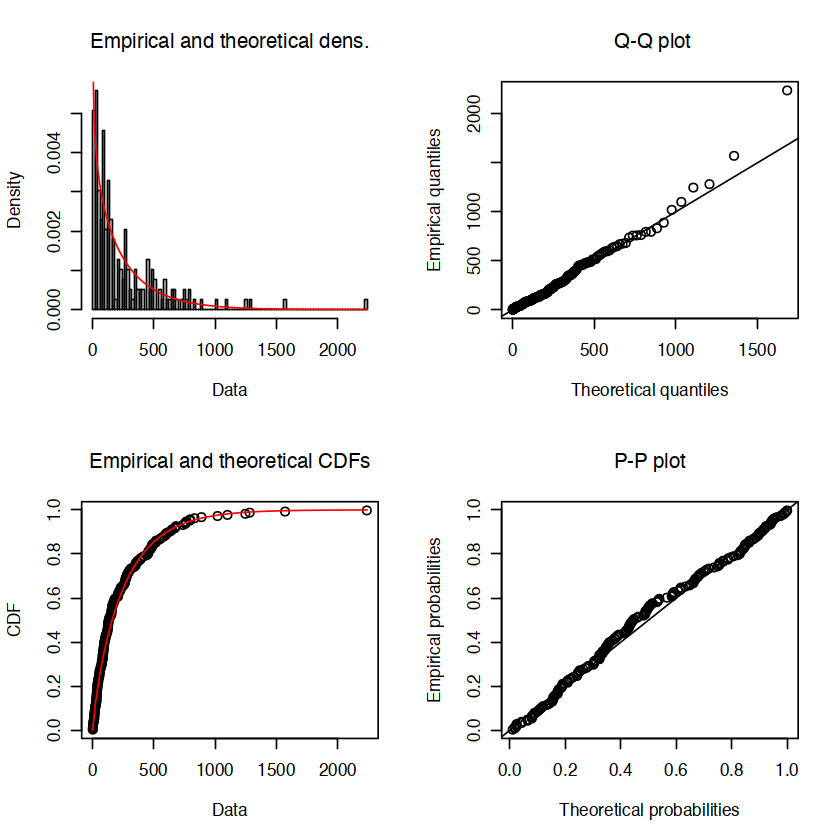

In [23]:
plot(fit.gamma, breaks = 100)

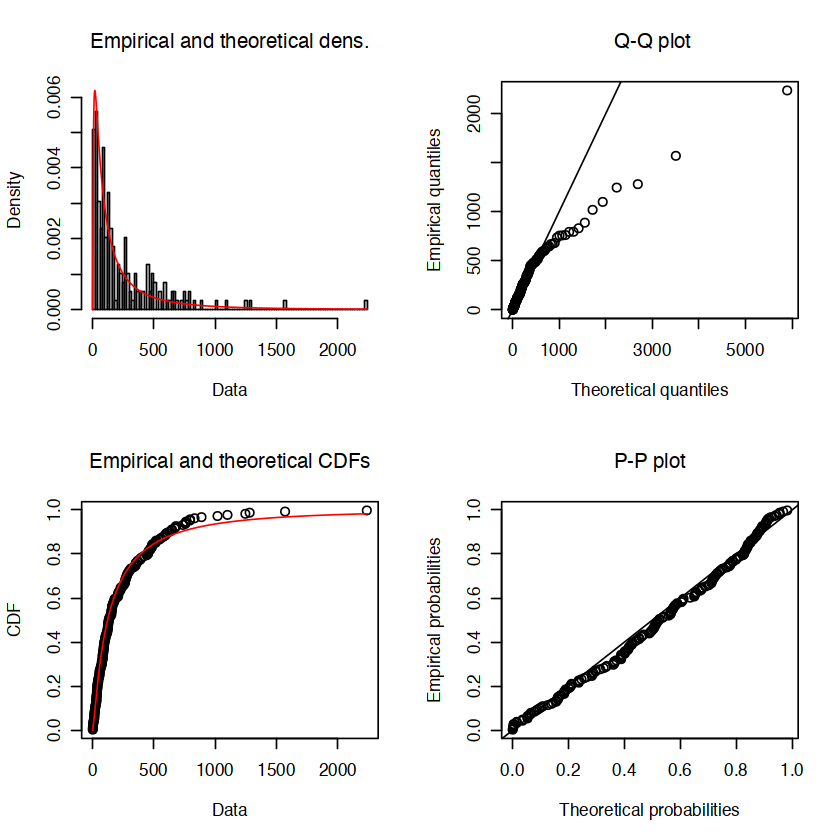

In [18]:
plot(fit.lnorm, breaks = 100)

In [20]:
summary(pbmc$TRB[!is.na(pbmc$TRB)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    55.0   132.0   250.1   351.0  2237.0 

In [21]:
dim(pbmc)

[1] 534  66

CapTCR-seq histogram

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


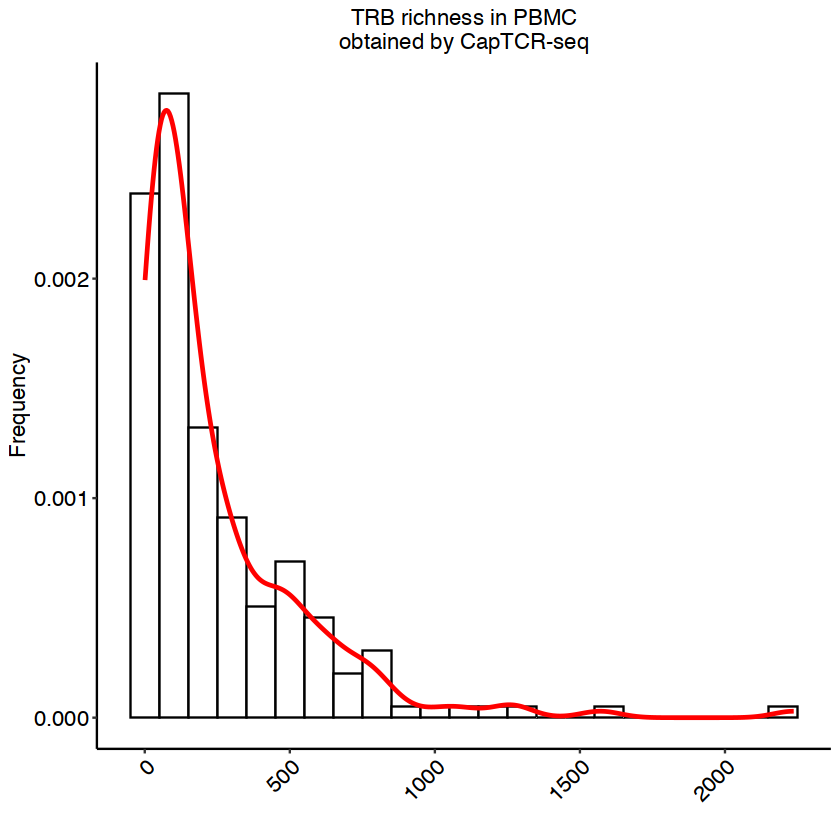

In [19]:
histdenp(pbmc[!is.na(pbmc$TRB),], "TRB", 100) +
labs(x = "", y = "Frequency", title = "TRB richness in PBMC\nobtained by CapTCR-seq") #regardless of cycle or cancer type

Draw random samples

In [20]:
allAdaptive_good <- readr::read_rds(file = paste0(datapath, "Adaptivedatasets/allAdaptive_good.rds"))

In [21]:
head(allAdaptive_good)

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
21,Peds_Ctrl_2,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_2,NA
22,MAS_3,Henderson,Child,NA,MAS,MAS_3,NA
23,Peds_Febrile_Ctrl_3,Henderson,Child,NA,Peds febrile Control,Peds_Febrile_Ctrl_3,NA
25,KD_4,Henderson,Child,NA,KD,KD_4,NA
26,KD_3,Henderson,Child,NA,KD,KD_3,NA
29,sJIA_7,Henderson,Child,NA,sJIA,sJIA_7,NA


In [22]:
table(allAdaptive_good$study)


        Emerson       Henderson        Mitchell Mitchell_Denver 
            773              25             203             131 

In [23]:
henderson <- allAdaptive_good[ which(allAdaptive_good$study == "Henderson"),]
emerson <- allAdaptive_good[ which(allAdaptive_good$study == "Emerson"),]
mitchel <- allAdaptive_good[ which(allAdaptive_good$study == "Mitchell"),]

In [24]:
table(mitchel$disease) # used 94 samples as gliph reference, so we can't use them again


Ctrl  T1D 
  94  109 

In [25]:
emerson_child <- emerson[ which(emerson$age < 19),]
emerson_adult <- emerson[ which(emerson$age > 19),]

In [26]:
# has to be cmv negative
emerson_child <- emerson_child[ emerson_child$disease == "Cytomegalovirus -",]
emerson_adult <- emerson_adult[ emerson_adult$disease == "Cytomegalovirus -",]

In [27]:
# remove emerson validation cohort, just in case
emerson_adult <- emerson_adult[!grepl("Keck", emerson_adult$sample_name),]

In [28]:
dim(emerson_child)
dim(emerson_adult)

[1] 21  7

[1] 256   7

In [29]:
head(henderson)

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
21,Peds_Ctrl_2,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_2,NA
22,MAS_3,Henderson,Child,NA,MAS,MAS_3,NA
23,Peds_Febrile_Ctrl_3,Henderson,Child,NA,Peds febrile Control,Peds_Febrile_Ctrl_3,NA
25,KD_4,Henderson,Child,NA,KD,KD_4,NA
26,KD_3,Henderson,Child,NA,KD,KD_3,NA
29,sJIA_7,Henderson,Child,NA,sJIA,sJIA_7,NA


In [30]:
henderson_child <- henderson[ grepl("healthy", henderson$disease),]

In [31]:
henderson_child # too few samples :( 

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
21,Peds_Ctrl_2,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_2,NA
70,Peds_Ctrl_1,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_1,NA
76,Peds_Ctrl_7,Henderson,Child,NA,Peds healthy Control,Peds_Ctrl_7,NA


In [32]:
dim(emerson_child)
dim(emerson_adult)

[1] 21  7

[1] 256   7

In [33]:
21 + 256

[1] 277

In [34]:
mydist

Warning message in (new("standardGeneric", .Data = function (object) :
"arithmetics on distributions are understood as operations on r.v.'s
see 'distrARITH()'; for switching off this warning see '?distroptions'"


Distribution Object of Class: AbscontDistribution

In [35]:
# draw 277 samples from the weibull distribution to match distribution observed in INT data

In [36]:
randomvals <- mydist@r(277)
summary(randomvals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.137   59.607  165.234  265.651  360.834 1891.207 

In [38]:
# round to nearest integer
randomvals <- round(randomvals)

In [39]:
randomvals

[1]   75  156  249  208   72 1327  249  445    8  339   60   84  115  109   25
 [16]  595  198   24  243  216  223   91  141  436  986   48  159  124    1   70
 [31]   32   62   33  261  294  279   55  309   73   90 1100  305  111  260  378
 [46]    1   18   16   12  483   82  238  889  465  157  476  724    6  293 1109
 [61]   56  404   40 1529   18  745  572  331   10  101  583   48    7  203  281
 [76]   16  305   82  104  217  222  165  254  199  359  162  399  335   60   19
 [91]   44  611  358   20  399   35  233  371   11   11   10  113  570  496    1
[106]   36  167  167  107   93   94   18  288  181   95  319 1452   57   44   10
[121]  236  453  119  238  169   61  796   77   18  139  192   69  306  113  136
[136]  341  277  187  188  248   33   46  366  583  661 1331   76  115  562  444
[151]   62  828  263   35  124  161  456  654   75  268   42  490  150   30   28
[166]  187  157  417  181  226  140  107  412   12  439   62   40 1593  683  157
[181]  884   82  302  987   47   89  425   26   18   56  390   68  262  293   46
[196]   75  264  969   87  269   40  361  120  193   77  565  521  607   17   50
[211]   26  129  112   54   79  731  653  366  182  760   18  278   67    3  107
[226] 1891  259  752   99   54  536  251  271   31  171  106   78  292  150   77
[241]   95  149  469   36  539   30  186  126  355   59   55  260   72  268   42
[256]  222   11  114    9  380  289  578  441  907   37 1051   57  442  185   13
[271]  583  419    3  680    7   57  589

In [40]:
readr::write_rds(randomvals, file = paste0(h4hpath,"analysis/GLIPH/int_random_weibullvals.rds"))

Adaptive filelist

In [41]:
# use cleaned up Adaptive data
myfilelist <- list.files("/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data/", 
                        pattern = ".tsv", full.names = T, recursive = T)

In [42]:
myfilelist <- myfilelist[!grepl("files", myfilelist)]

In [43]:
head(myfilelist)

[1] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0001_MC1.tsv"
[2] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0002_MC1.tsv"
[3] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0003_MC1.tsv"
[4] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0004_MC1.tsv"
[5] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0005_MC1.tsv"
[6] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//Keck0006_MC1.tsv"

In [44]:
myfilelist_df <- data.frame(file = myfilelist, stringsAsFactors = F)

In [45]:
myfilelist_df$sample <- gsub(".tsv", "", basename(myfilelist_df$file))

In [46]:
tail(myfilelist_df)

,file,sample
,<chr>,<chr>
781,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00662.tsv,P00662
782,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00663.tsv,P00663
783,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00665.tsv,P00665
784,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00666.tsv,P00666
785,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00667.tsv,P00667
786,/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00668.tsv,P00668


In [47]:
myfilelist_df$file <- gsub("/Users/anabbi/Desktop/H4H/INTERCEPT/",
"/cluster/projects/pughlab/pediatric/projects/INTERCEPT/", myfilelist_df$file)

In [48]:
dim(emerson_child)
dim(emerson_adult)

[1] 21  7

[1] 256   7

In [49]:
head(emerson_adult)

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
568,P00416,Emerson,Adult,Female,Cytomegalovirus -,P00416,50
569,P00037,Emerson,Adult,Male,Cytomegalovirus -,P00037,29
572,P00371,Emerson,Adult,Male,Cytomegalovirus -,P00371,40
576,P00260,Emerson,Adult,Female,Cytomegalovirus -,P00260,54
577,P00219,Emerson,Adult,Female,Cytomegalovirus -,P00219,32
581,P00134,Emerson,Adult,Female,Cytomegalovirus -,P00134,28


In [50]:
filelist_emerson_child <- myfilelist_df$file[ myfilelist_df$sample %in% emerson_child$sample_name]
filelist_emerson_adult <- myfilelist_df$file[ myfilelist_df$sample %in% emerson_adult$sample_name]

In [54]:
head(filelist_emerson_child)

[1] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00015.tsv"
[2] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00023.tsv"
[3] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00091.tsv"
[4] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00092.tsv"
[5] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00171.tsv"
[6] "/cluster/projects/pughlab/pediatric/projects/INTERCEPT/analysis/GLIPH/custom_refs/emerson_data//P00183.tsv"

In [55]:
filelist_emerson <- c(filelist_emerson_adult, filelist_emerson_child)

In [53]:
length(filelist_emerson_adult)
length(filelist_emerson)

[1] 255

[1] 510

In [56]:
readr::write_rds(filelist_emerson, file = paste0(h4hpath,"analysis/GLIPH/emerson_goodfiles.rds"))

In [93]:
readr::write_rds(filelist_emerson_adult, file = paste0(h4hpath,"analysis/GLIPH/run_gliph/emerson_mitchel_int/filelist_emerson_adult.rds"))
readr::write_rds(filelist_emerson_child, file = paste0(h4hpath,"analysis/GLIPH/run_gliph/emerson_mitchel_int/filelist_emerson_child.rds"))